In [78]:
from manim import *
from manim_pptx import *

titleKwargs = {'font_size': 36, 'include_underline':True, 'underline_buff': 0.125}

In [48]:
%%manim -v WARNING  --progress_bar None -pql MotivatingIdea_ACC
class MotivatingIdea_ACC(PPTXScene):
    def construct(self):
        title = Title("Example: Adaptive Cruise Control")
        self.add(title)
        
        car = ImageMobject("drawings/cars.png")
        self.play(FadeIn(car))
        self.endSlide()

        car.generate_target()
        car.target.scale(0.6)
        car.target.shift(4*LEFT + UP)


        dyn = MathTex(r"\frac{d}{dt}\begin{bmatrix}d\\ v\end{bmatrix} &= \begin{bmatrix}v_0 - v\\ -F(v)/m\end{bmatrix} + \begin{bmatrix}0\\g_0\end{bmatrix}u, \\", 
          r"|u| &\leq 0.25\\",
          r"\text{safe if } d &\geq 1.8 v\\",
          r"\therefore ", r"h(x) &= d - 1.8 v"
          )
        dyn.set_color_by_tex("0.25", BLUE)
        dyn.set_color_by_tex("h", RED)
        dyn.shift(3*RIGHT)

        cite = Tex(r"[Ames, 2019]", font_size=26)
        cite.to_corner(DL)
        cite.shift(0.35*DOWN)


        self.play(MoveToTarget(car), FadeIn(dyn, cite))
        self.endSlide()
        
        dyn2 =  MathTex(r"\dot x &= f(x) + g(x) u\\", 
          r"|u| &\leq 0.25\\",
          r"h(x) &= d - 1.8 v", font_size=48
          )
        
        dyn2.next_to(car, DOWN)
        
        self.play(TransformMatchingTex(dyn, dyn2))
        self.remove(dyn, cite)
        self.add(dyn2)
        
        s0 = ImageMobject("drawings/acc_sets_0.png")
        sopt = ImageMobject("drawings/acc_sets_opt.png")
        sfin = ImageMobject("drawings/acc_sets_opt_final.png")
        sgap = ImageMobject("drawings/acc_sets_opt_final_gap.png")
        for s in [s0, sopt, sfin, sgap]:
            s.width = 6
            s.shift(0.5*DOWN + 2*RIGHT)
            
        self.play(FadeIn(s0))
        self.endSlide()
        
        self.play(ReplacementTransform(s0, sopt))
        self.endSlide()
        
        self.play(ReplacementTransform(sopt, sfin))
        self.play(ReplacementTransform(sfin, sgap))
        
        self.endSlide()
        
        self.play(FadeOut(car, dyn2), ReplacementTransform(sgap, s0.to_edge(LEFT)))
        self.wait()
        self.endSlide()

    

In [110]:
%%manim -v WARNING  --progress_bar None -pql MotivatingIdea_Sets

class MotivatingIdea_Sets(PPTXScene):
    def construct(self):
        title = Title("Example: Adaptive Cruise Control")
        title_new = Title("Motivating Idea")
        self.add(title)

        s0 = ImageMobject("drawings/acc_sets_opt.png")
        s0.width = 6
        s0.shift(0.5*DOWN + 2*RIGHT)
        s0.to_edge(LEFT)
        self.add(s0)
        
        self.play(ReplacementTransform(title, title_new))
        self.endSlide()
        
        s2 = ImageMobject("drawings/sets_abstract_opt.png")
        s2.width = 6
        s2.shift(0.5*DOWN + 2 * RIGHT)
        s2.to_edge(LEFT)
        
        
        s1 = ImageMobject("drawings/sets_abstract.png")
        s1.width = 6
        s1.shift(0.5*DOWN + 2*RIGHT)
        s1.to_edge(LEFT)
        
        
        self.play(FadeOut(s0), FadeIn(s2))
        self.play(FadeOut(s2), FadeIn(s1))
        self.play(s1.animate.shift(LEFT))
        self.endSlide()
        
        # choose a font size
        fs = 36
        
        b = MathTex(r"\text{Consider }b(x) &\triangleq \inf_{u \in \mathcal{U}} \dot h(x, u) + \alpha(h(x))\\",
                    r"\mathcal{C} &= \{ x : b(x) \geq 0 \}",
                   font_size=fs)
        b.shift(1.5*UP + 2*RIGHT)

        sC = ImageMobject("drawings/sets_abstract_C.png")
        sC.width = 6
        sC.shift(0.5*DOWN + 2*RIGHT)
        sC.to_edge(LEFT).shift(LEFT)
        
        
        self.play(FadeOut(s1), FadeIn(sC, b))
        self.endSlide()
        
        sC1 = ImageMobject("drawings/sets_abstract_C_p1.png")
        sC1.width = 6
        sC1.shift(0.5*DOWN + 2*RIGHT)
        sC1.to_edge(LEFT).shift(LEFT)
        
        usefulA1 = MathTex(r"\text{Useful property 1: If }x \in \partial S, \text{ and } \nexists \text{ safe } u\\", font_size=fs)
        usefulA2 = MathTex(r"h(x) = 0 \text{ and }  \dot h(x, u) < 0 \ \forall u \in \mathcal{U}", font_size=fs)
        usefulA3 = MathTex(r"h(x) = 0 \text{ and } \inf_{u \in \mathcal{U}} \dot h(x, u) < 0", font_size=fs)
        usefulA4 = MathTex(r"h(x) = 0 \text{ and } \inf_{u \in \mathcal{U}} \dot h(x, u) + \alpha(h(x))< 0", font_size=fs)
        usefulA5 = MathTex(r"h(x) = 0 \text{ and } b(x) < 0 ", font_size=fs)
        usefulA6 = MathTex(r"\therefore x \notin \mathcal{C}", font_size=fs)
        
        usefulA1.next_to(b, DOWN)
        usefulA2.next_to(usefulA1, DOWN)
        usefulA3.next_to(usefulA2, DOWN).align_to(usefulA2, LEFT)
        usefulA4.next_to(usefulA3, DOWN).align_to(usefulA2, LEFT)
        usefulA5.next_to(usefulA4, DOWN).align_to(usefulA2, LEFT)
        usefulA6.next_to(usefulA5, DOWN).align_to(usefulA2, LEFT)
        
        self.play(FadeOut(sC), FadeIn(sC1, usefulA1))
        self.endSlide()
        
        self.play(FadeIn(usefulA2))
        self.endSlide()
        
        self.play(FadeIn(usefulA3))
        self.endSlide()
        
        self.play(FadeIn(usefulA4))
        self.endSlide()

        self.play(FadeIn(usefulA5))
        self.endSlide()
        
        
        concA = Tex(r"$\therefore$ unsafe $\partial \mathcal{S}$ not in  $\mathcal{C}$", color=BLUE, font_size=48)
        concA.next_to(usefulA6).shift(RIGHT)
        
        self.play(FadeIn(usefulA6, concA))
        self.endSlide()
        
        self.play(FadeOut(usefulA1, usefulA2, usefulA3, usefulA4, usefulA5, usefulA6, concA))
        
        
        sC2 = ImageMobject("drawings/sets_abstract_C_p2.png")
        sC2.width = 6
        sC2.shift(0.5*DOWN + 2*RIGHT)
        sC2.to_edge(LEFT).shift(LEFT)
        
        usefulB1 = MathTex(r"\text{Useful property 2: If }x \in \mathcal{C} \text{ and } x \in \partial S,\\", font_size=fs)
        usefulB2 = MathTex(r"b(x) \geq 0, \text{ and } h(x) = 0.\\", font_size=fs)
        usefulB3 = MathTex(r"b(x) = \inf_{u \in \mathcal{U}} \dot h(x, u)", 
                          r" + \alpha(h(x)) ", r"\geq 0\\", font_size=fs)
        usefulB4 = MathTex(r"\therefore & \forall u \in \mathcal{U}: \dot h(x, u) \geq 0", font_size=fs)
        
        usefulB1.next_to(b, DOWN)
        usefulB2.next_to(usefulB1, DOWN)
        usefulB3.next_to(usefulB2, DOWN).align_to(usefulB2, LEFT)
        usefulB4.next_to(usefulB3, DOWN)

        
        self.play(FadeOut(sC1), FadeIn(sC2, usefulB1))
        self.endSlide()
        self.play(FadeIn(usefulB2))
        self.endSlide()
        self.play(FadeIn(usefulB3))
        self.endSlide()
        
        cross = Cross(usefulB3[1], stroke_color=RED, stroke_width=3)
        self.play(Create(cross))
        self.endSlide()
        
        self.play(FadeIn(usefulB4))
        self.endSlide()
        
        concB = Tex(r"If $u = \pi(x)$ keeps $x \in \mathcal{C}$,\\", r"then $\mathcal{S} \cap \mathcal{C}$ is forward invariant", color=BLUE, font_size=48)
        concB.next_to(usefulB4, DOWN).shift(0.25*DOWN)
        self.play(FadeIn(concB))
        self.endSlide()
        
        




In [76]:
%%manim -v WARNING  --progress_bar None -pql FormalConstruction
class FormalConstruction(PPTXScene):
    def construct(self):
        title=Title("Formal Construction (Main Result)")
        self.play(FadeIn(title))
        self.endSlide()
        
        #### IMPORT SVG DRAWING and SET COLORS
        sets = SVGMobject("drawings/SandC_v6.svg", color=BLUE, fill_opacity=0.25, height=3.5)
        sets.to_edge(LEFT).shift(0.8*UP + RIGHT)
        fills = [BLUE, GREEN_E, GREEN_A, YELLOW]
        for i, s in enumerate(sets):    
            s.set_fill(fills[i], 0.25)
            s.set_stroke(fills[i])
        
        #### CREATE CAPTIONS FOR SVG
        Cs = MathTex(r"\mathcal{S} &= \{ x : h(x) \geq 0 \}\\",
                     r"\mathcal{C}_1 &= \{ x : b_1(x) \geq 0 \}\\",
                     r"& \ \ \cdots\\", 
                     r" \mathcal{C}_N &= \{ x : b_N(x) \geq 0 \}\\",
                     r"\mathcal{C}^* &= \mathcal{S} \cap \mathcal{C}_1 \cdots \cap \mathcal{C}_N",
                     font_size=36)
        Cs[0].set_color(fills[0])
        Cs[1].set_color(fills[1])
        Cs[3].set_color(fills[2])
        Cs[4].set_color(fills[3])
        Cs.next_to(sets, DOWN)
        boxC = SurroundingRectangle(Cs[4], color=ORANGE)
        
        #### DEFINE Bs
        bs = MathTex(r"b_0(x) &= h(x)\\",
        r"b_1(x) &= \inf_{u \in \mathcal{U}} \dot b_0(x, u) + \alpha_0 (b_0(x))\\",
        r"&\ \ \cdots\\",
        r"b_N(x) &= \inf_{u \in \mathcal{U}} \dot b_{N-1}(x, u) + \alpha_{N-1} (b_{N-1}(x))"
        , font_size=36)
        bs.to_edge(RIGHT).shift(0.5*LEFT)
        bs.align_to(sets, UP)
        
        bsexplain = MathTex(r"b_1(x)", r"&= \inf_{u \in \mathcal{U}} L_fb_0(x) + L_gb_0(x) u + \alpha_0 (b_0(x))\\",
                            r"&(b_i(x)\text{ does not depend on } u)", font_size=36)
        bsexplain.next_to(bs[1], DOWN).align_to(bs[1], LEFT)
        bsexplain[0].set_color(BLACK)
        
        
        #### START ANIMATIONS
        self.play(FadeIn(bs[0], Cs[0]),DrawBorderThenFill(sets[0]))
        self.endSlide()
        
        self.play(FadeIn(bs[1], Cs[1]),DrawBorderThenFill(sets[1]))
        self.endSlide()
        
        self.play(FadeIn(bsexplain))
        self.endSlide()
        
        self.play(FadeOut(bsexplain))
        self.endSlide()
        
        self.play(FadeIn(bs[2], Cs[2]))
        self.endSlide()
        
        self.play(FadeIn(bs[3], Cs[3]), DrawBorderThenFill(sets[2]))
        self.endSlide()
        
        self.play(FadeIn(Cs[4], boxC), DrawBorderThenFill(sets[3]))
        self.endSlide()
        
        #### BRING IN DEFINITION
        cond = MathTex(r"&\text{If } \exists \alpha_N \in \mathcal{K} \text{ s.t. }\forall x \in \mathcal{C}^*,\\", 
                       r"&\ \sup_{u \in \mathcal{U}} \dot b_N(x, u) + \alpha_N(b_N(x)) \geq 0\\",
                       r"&\text{then } b_N \text{ is an ICCBF.}", font_size=48)
        cond.next_to(bs, DOWN).shift(0.7*DOWN)
        boxCond = SurroundingRectangle(cond, color=ORANGE, buff=MED_LARGE_BUFF*0.5)
        condLab = Tex(r"Def:", font_size=36, color=ORANGE)
        condLab.next_to(boxCond, UP).align_to(boxCond, LEFT).shift(0.15*DOWN)
        
        condGroup = VGroup(cond, boxCond, condLab)
        
        self.play(FadeIn(condGroup))
        self.endSlide()
        
        self.play(FadeOut(bs, Cs, boxC), condGroup.animate.align_to(sets, UP).shift(0.0*DOWN))

        #### BRING IN THEOREM
        thm = Tex(r"If $b_N$ is an ICCBF, any Lips. controller $\pi$ s.t.\\", 
                 r"$\pi(x) \in \{ u \in \mathcal{U} : \dot b_N(x, u) + \alpha_N(b_N(x)) \geq 0 \}$\\",
                 r"renders $\mathcal{C}^* \subset \mathcal{S}$ forward invariant.")
        thm.to_edge(DOWN).shift(0.1*UP)
        thmBox = SurroundingRectangle(thm, color=BLUE, buff=MED_LARGE_BUFF*0.5)
        thmLab = Tex(r"Theorem:", font_size=36, color=BLUE)
        thmLab.next_to(thmBox, UP).align_to(thmBox, LEFT).shift(0.15*DOWN)
        self.play(FadeIn(thm, thmBox, thmLab))
        self.endSlide()

        

FileNotFoundError: [Errno 2] No such file or directory: './temp/2201830969_126804726_4137563629.mp4.png'

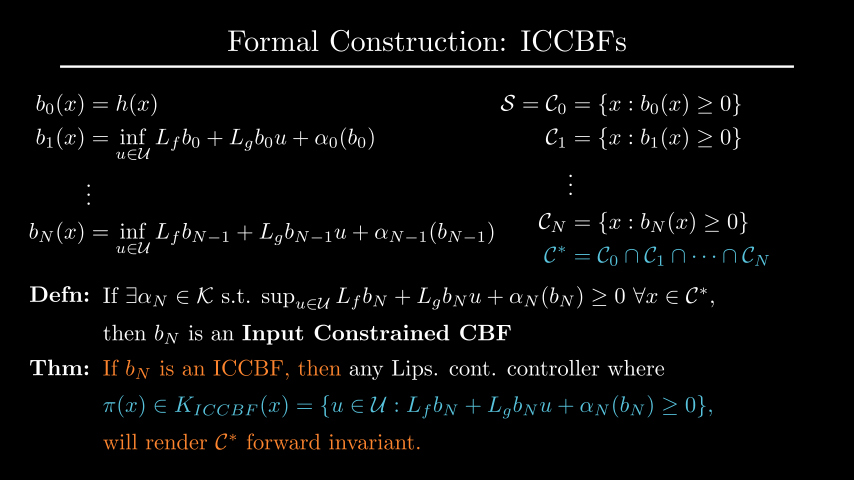

In [109]:
%%manim -v WARNING  --progress_bar None -sql FormalConstruction
class FormalConstruction(PPTXScene):
    def construct(self):
        title=Title("Formal Construction")
        title2=Title("Formal Construction: ICCBFs")
        self.add(title)
        self.play(ReplacementTransform(title, title2))


        bs = MathTex(r"b_0(x) &= h(x)\\",
        r"b_1(x) &= \inf_{u \in \mathcal{U}} {{L_fb_0}}{{(x)}} + {{L_gb_0}}{{(x)}}{{u + }}{{\alpha_0(b_0}}{{(x)}}{{)}}\\", 
        r"&\vdots\\",
        r"b_N(x) &= \inf_{u \in \mathcal{U}} {{L_fb_{N-1}}}{{(x)}}{{ + }}{{L_gb_{N-1}}}{{(x)}}{{ u + }}{{\alpha_{N-1}(b_{N-1}}}{{(x)}}{{)}}"
        , font_size=36)
        bs.shift(2*LEFT)

        bsNoX = MathTex(r"b_0(x) &= h(x)\\",
        r"b_1(x) &= \inf_{u \in \mathcal{U}} {{L_fb_0}} + {{L_gb_0}}{{u + }}{{\alpha_0(b_0}}{{)}}\\", 
        r"&\vdots\\",
        r"b_N(x) &= \inf_{u \in \mathcal{U}} {{L_fb_{N-1}}}{{ + }}{{L_gb_{N-1}}}{{ u + }}{{\alpha_{N-1}(b_{N-1}}}{{)}}"
        , font_size=36)
        # bsNoX.shift(2*LEFT)
        bsNoX.align_to(bs, LEFT)


        cs = MathTex(r"\mathcal{S} = \mathcal{C}_0 &= \{x : b_0(x) \geq 0\}\\",
        r"\mathcal{C}_1 &= \{x : b_1(x) \geq 0\}\\",
        r"&\vdots\\",
        r"\mathcal{C}_N &= \{x : b_N(x) \geq 0\}\\",
        r"\mathcal{C}^* &= \mathcal{C}_0 \cap \mathcal{C}_1 \cap \cdots \cap \mathcal{C}_N"
        , font_size=36
        )
        cs.set_color_by_tex("\mathcal{C}^*", BLUE)
        cs.next_to(bsNoX, 0.5*RIGHT)
        cs.align_to(bs, UP)

        self.play(FadeIn(bs))
        self.endSlide()

        self.play(TransformMatchingTex(bs, bsNoX))
        self.remove(bs)
        self.add(bsNoX)
        self.endSlide()

        self.play(FadeIn(cs))
        self.endSlide()

        self.play(bsNoX.animate.shift(1.1*UP), cs.animate.shift(1.1*UP))
        self.endSlide()

        defLabel = Tex(r"\textbf{Defn:}", font_size=36)
        defLabel.shift(0.9*DOWN)
        definition =VGroup()
        d1 = Tex(r"If ",r"$\exists \alpha_N \in \mathcal{K}$ s.t. ", r"$\sup_{u\in \mathcal{U}} L_fb_N + L_gb_N u + \alpha_N(b_N) \geq 0 \ \forall x \in \mathcal{C}^*$, \\", font_size=36)
        # d1.set_color_by_tex("If", BLUE)
        definition += d1

        d2 = Tex(r"then $b_N$ is an \textbf{Input Constrained CBF}", font_size=36)
        # d2.set_color_by_tex("b_N", BLUE)
        definition += d2

        definition.arrange(DOWN, center=False, aligned_edge=LEFT)

        defLabel.to_edge(LEFT)

        definition.next_to(defLabel, RIGHT)
        definition.align_to(defLabel, UP)


        theoremLabel = Tex(r"\textbf{Thm:}", font_size=36)

        theorem = VGroup()
        t1 = Tex(r"If $b_N$ is an ICCBF, then", r" any Lips. cont. controller where", font_size=36)
        t1.set_color_by_tex("If", ORANGE)
        theorem += t1

        theorem += Tex(r"$\pi(x) \in K_{ICCBF}(x) = \{ u \in \mathcal{U} : L_fb_N + L_gb_N u + \alpha_N(b_N) \geq 0 \}$,", font_size=36, color=BLUE)
        t2 = Tex(r"will render $\mathcal{C}^*$ forward invariant.", font_size=36)
        t2.set_color_by_tex("forward", ORANGE)
        theorem += t2
        theorem.arrange(DOWN, center=False, aligned_edge=LEFT)

        theorem.next_to(definition, DOWN)
        theoremLabel.to_edge(LEFT)

        theorem.align_to(definition,LEFT)
        theoremLabel.align_to(theorem, UP)

        self.play(FadeIn(defLabel), FadeIn(definition))
        self.endSlide()


        self.play(FadeIn(theoremLabel), FadeIn(theorem))
        self.endSlide()



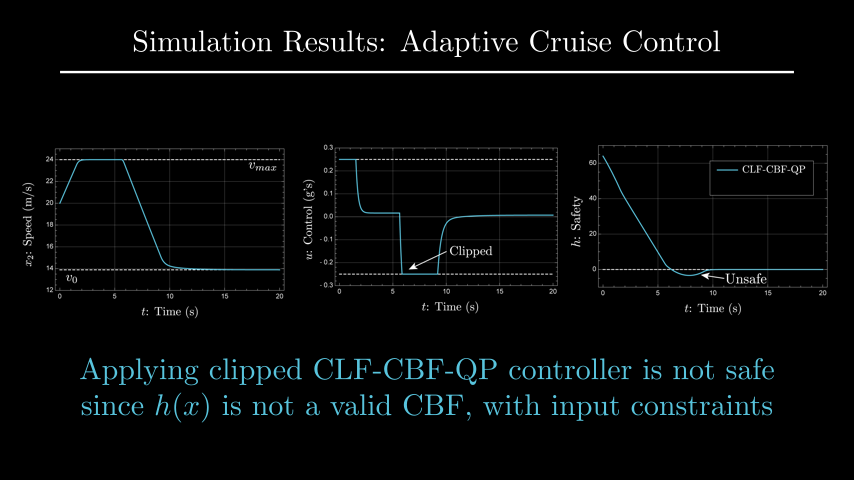

In [81]:
%%manim -v WARNING  --progress_bar None -sql SimulationResultsACC_res1
class SimulationResultsACC_res1(PPTXScene):
    def construct(self):
        title = Title("Simulation Results: Adaptive Cruise Control")
        self.add(title)

        cbf_standard = ImageMobject("drawings/acc_results_1.png")
        cbf_standard.width = 15
        cbf_standard.shift(DOWN)
        
        desc = Tex(r"Applying clipped CLF-CBF-QP controller is not safe\\since $h(x)$ is not a valid CBF, with input constraints", color=BLUE)
        desc.shift(2.5*DOWN)
        
        self.play(FadeIn(cbf_standard))
        self.play(FadeIn(desc))
        self.endSlide()

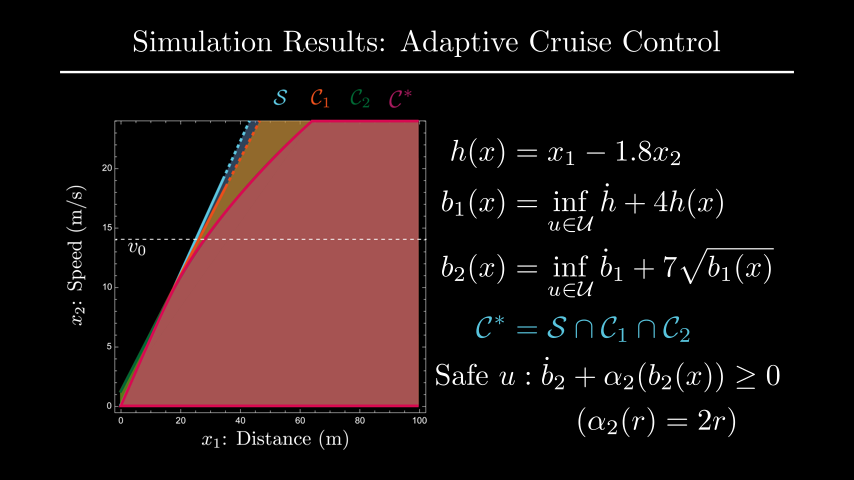

In [74]:
%%manim -v WARNING  --progress_bar None -sql SimulationResultsACC_res2
class SimulationResultsACC_res2(PPTXScene):
    def construct(self):
        title = Title("Simulation Results: Adaptive Cruise Control")
        self.add(title)
        
        s1 = ImageMobject("drawings/acc_sets_1.png")
        s2 = ImageMobject("drawings/acc_sets_2.png")
        s3 = ImageMobject("drawings/acc_sets_3.png")
        s4 = ImageMobject("drawings/acc_sets_4.png")
        for s in [s1,s2,s3,s4]:
            s.width = 6
            s.shift(0.5*DOWN + 3*LEFT)
            
        self.add(s1)
        
        cond1 = MathTex(r"h(x) &= x_1 - 1.8 x_2\\")
        
        cond1.next_to(s1, RIGHT)
        self.add(cond1)
        self.endSlide()
                
        cond2 = MathTex(r"h(x) &= x_1 - 1.8 x_2\\", 
                        r"b_1(x) &= \inf_{u \in \mathcal{U}} \dot h + ",r"\alpha_0(h(x))\\",
                        r"&{}\quad\quad \quad (\alpha_0(r) = 4 r)")
        cond2.set_color_by_tex(r"4", BLUE)
        cond2.next_to(s2, RIGHT)
        self.play(TransformMatchingTex(cond1, cond2))
        self.remove(cond1)
        self.add(cond2)
        self.endSlide()
        
        self.play(FadeOut(s1), FadeIn(s2))
        self.endSlide()
        
        
        cond3 = MathTex(r"h(x) &= x_1 - 1.8 x_2\\", 
                        r"b_1(x) &= \inf_{u \in \mathcal{U}} \dot h + ", r"4h(x)\\",
                        r"b_2(x) &= \inf_{u \in \mathcal{U}} \dot b_1 + ", r"\alpha_1(b_1(x))\\",
                        r"&{}\quad\quad \quad (\alpha_1(r) = 7 \sqrt{r}")
        cond3.set_color_by_tex(r"7", BLUE)
        cond3.next_to(s3, RIGHT)
        self.play(TransformMatchingTex(cond2, cond3))
        self.remove(cond2)
        self.add(cond3)
        self.endSlide()
        
        self.play(FadeOut(s2), FadeIn(s3))
        self.endSlide()
        
        
        cond4 = MathTex(r"h(x) &= x_1 - 1.8 x_2\\", 
                        r"b_1(x) &= \inf_{u \in \mathcal{U}} \dot h + ", r"4h(x)\\",
                        r"b_2(x) &= \inf_{u \in \mathcal{U}} \dot b_1 + ", r"7\sqrt{b_1(x)}\\",
                        r"\mathcal{C}^* &= \mathcal{S} \cap \mathcal{C}_1 \cap \mathcal{C}_2")
        cond4.set_color_by_tex(r"\mathcal{C}", BLUE)
        cond4.next_to(s4, RIGHT).shift(0.5*UP)
        self.play(TransformMatchingTex(cond3, cond4))
        self.remove(cond3)
        self.add(cond4)
        self.endSlide()
        
        self.play(FadeOut(s3), FadeIn(s4))
        self.endSlide()
        
        controller = MathTex(r"\text{Safe } u &: \dot b_2 + \alpha_2(b_2(x)) \geq 0\\&\quad \quad (\alpha_2(r) = 2 r)")
        controller.next_to(cond4, DOWN)
#         controller.set_color(RED)
        self.play(FadeIn(controller))
        self.endSlide()
        

        

In [83]:
%%manim -v WARNING  --progress_bar None -pql SimulationResultsACC_res3
class SimulationResultsACC_res3(PPTXScene):
    def construct(self):
        title = Title("Simulation Results: Adaptive Cruise Control")
        self.add(title)
        
        cbf1 = ImageMobject("drawings/acc_results_1.png")
        cbf1.width = 15
        cbf1.shift(DOWN)
        self.add(cbf1)
        
        cbf2 = ImageMobject("drawings/acc_results_2.png")
        cbf2.width = 15
        cbf2.shift(DOWN)
        
        self.play(ReplacementTransform(cbf1, cbf2))
        self.endSlide()
        
        
        desc = Tex(r"Using the ICCBF, the controller starts\\ braking earlier to maintain safety", color=BLUE)
        desc.shift(2.5*DOWN)
        
        self.play(FadeIn(desc))
        self.endSlide()


In [117]:
%%manim -v WARNING  --progress_bar None -pql SimulationResultsISS_1
class SimulationResultsISS_1(PPTXScene):
    def construct(self):
        title = Title("Simulation Results: Docking")
        self.add(title)
        
        setup = ImageMobject("drawings/iss_setup.png")
        setup.width = 15
        self.add(setup)
        self.endSlide()
        
        setup.generate_target()
        setup.target.scale(0.5).shift(UP)
        
        self.play(MoveToTarget(setup))
        self.endSlide()
        
        dyn = MathTex(
            r"\frac{d}{dt} \begin{bmatrix} p_x\\ p_y \\  v_x \\ v_y \\ \psi \end{bmatrix} = \begin{bmatrix}v_x \\v_y \\n^2 p_x + 2 n v_y + \frac{\mu}{r^2} - \frac{\mu(r+p_x)}{r_c^3}\\n^2 p_y - 2 n v_x - \frac{\mu p_y} {r_c^3}\\\omega\end{bmatrix} + \frac{1}{m_c}\begin{bmatrix}0 \\ 0 \\ u_x \\ u_y \\ 0\end{bmatrix}",
            font_size=30)
        dyn.next_to(setup.target,DOWN).shift(3*LEFT)
        
        cons = MathTex(r"|u_x| + |u_y| \leq 0.25\text{ kN}")
        cons.next_to(dyn, RIGHT).align_to(dyn, UP).shift(RIGHT).shift(0.5*DOWN)
        
        safety = MathTex(r"h(x) = \cos \theta - \cos 10^\circ")
        safety.next_to(cons, DOWN)
        
        self.play(FadeIn(dyn, cons, safety))
        self.endSlide()
        

In [125]:
%%manim -v WARNING  --progress_bar None -pql SimulationResultsISS_1
class SimulationResultsISS_1(PPTXScene):
    def construct(self):
        title = Title("Simulation Results: Docking")
        self.add(title)
        
        setup = ImageMobject("drawings/iss_setup.png")
        setup.width = 15
        self.add(setup)
        self.endSlide()
        
        setup.generate_target()
        setup.target.scale(0.7).to_edge(DOWN).to_edge(LEFT).shift(DOWN + LEFT)
        
        self.play(MoveToTarget(setup))
        self.endSlide()
        
        dyn = MathTex(
            r"\frac{d}{dt} \begin{bmatrix} p_x\\ p_y \\  v_x \\ v_y \\ \psi \end{bmatrix} = \begin{bmatrix}v_x \\v_y \\n^2 p_x + 2 n v_y + \frac{\mu}{r^2} - \frac{\mu(r+p_x)}{r_c^3}\\n^2 p_y - 2 n v_x - \frac{\mu p_y} {r_c^3}\\\omega\end{bmatrix} + \frac{1}{m_c}\begin{bmatrix}0 \\ 0 \\ u_x \\ u_y \\ 0\end{bmatrix}",
            font_size=36)
        dyn.shift(1.35*UP)
        
        cons = MathTex(r"|u_x| + |u_y| \leq 0.25\text{ kN}")
        cons.next_to(setup.target, RIGHT).shift(LEFT)
        
        safety = MathTex(r"h(x) = \cos \theta - \cos 10^\circ")
        safety.next_to(cons, DOWN)
        
        self.play(FadeIn(dyn, cons, safety))
        self.endSlide()
        

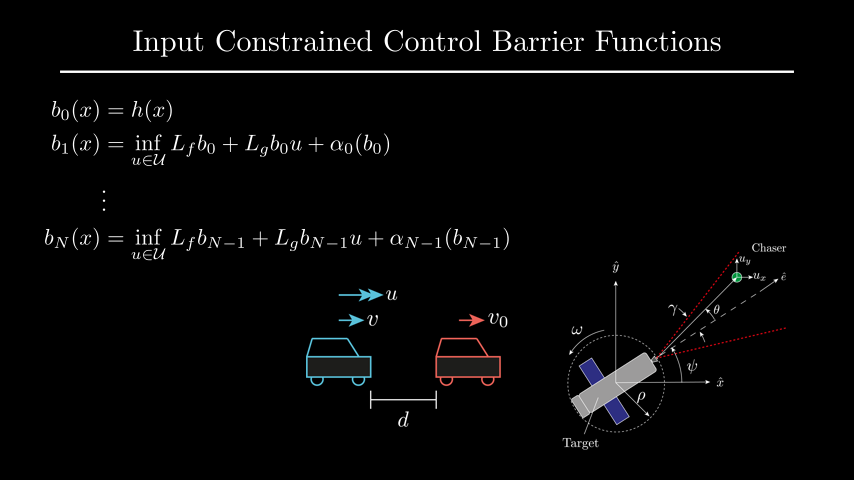

In [141]:
%%manim -v WARNING  --progress_bar None -sql OutlineSlide_Conclusion
class OutlineSlide_Conclusion(PPTXScene):
    def construct(self):

        title_short = Title(r"Input Constrained Control Barrier Functions")
        title_new = Title(r"Background and Problem Statement")

        blist = BulletedList(
            "Background and Problem Statement",
             "Motivating Idea",
              "Formal Construction",
               "Simulation Results")

        self.add(title_short, blist)
        self.endSlide()
        
        bsNoX = MathTex(r"b_0(x) &= h(x)\\",
            r"b_1(x) &= \inf_{u \in \mathcal{U}} {{L_fb_0}} + {{L_gb_0}}{{u + }}{{\alpha_0(b_0}}{{)}}\\", 
            r"&\vdots\\",
            r"b_N(x) &= \inf_{u \in \mathcal{U}} {{L_fb_{N-1}}}{{ + }}{{L_gb_{N-1}}}{{ u + }}{{\alpha_{N-1}(b_{N-1}}}{{)}}"
            , font_size=36)
        bsNoX.shift(1*UP + 2.5*LEFT)    
        self.play(FadeOut(blist), FadeIn(bsNoX))
        self.endSlide()
        
        
        diag = ImageMobject("drawings/conclusion.png")
        diag.width = 8
        diag.to_edge(DOWN).shift(2*RIGHT)
        self.add(diag)
        self.endSlide()
        
        

        

In [87]:
%%manim -v WARNING  --progress_bar None -pql TitleSlide
class TitleSlide(PPTXScene):
    def construct(self):
        title = Tex(r"Safe Control Synthesis via \\ Input Constrained \\ Control Barrier Functions")#, font_size=144)
        title.shift(0.5*UP)
        authors = Tex(r"Devansh Agrawal \& Dimitra Panagou \\ University of Michigan", font_size=36)
        authors.shift(1.5*DOWN)

        title_short = Title(r"Input Constrained Control Barrier Functions", **titleKwargs)

        self.play(
            Write(title),
            FadeIn(authors)
        )

        self.endSlide()

        blist = BulletedList(
        "Background and Problem Statement",
         "Motivating Idea",
          "Formal Construction",
           "Simulation Results")

        
        blist2 = BulletedList(
        "Background and Problem Statement",
         "Motivating Idea (ex. Adapative Cruise Control)",
          "Formal Construction",
           "Simulation Results (ex. Autonomous Rendezvous)")
        
        blist.align_to(blist2, LEFT).align_to(blist2, UP)
        
        self.play(
        Transform(title, title_short),
        FadeOut(authors),
        )


        self.play(FadeIn(blist))
        self.endSlide()

        self.play(FadeOut(blist), FadeIn(blist2))
        self.endSlide()


In [89]:
%%manim -v WARNING  --progress_bar None -pql BackgroundSlide_CBFs
class BackgroundSlide_CBFs(PPTXScene):
    def construct(self):
        title = Title(r"Background and Problem Statement", **titleKwargs)
        title2 = Title(r"Background: Control Barrier Functions", **titleKwargs)
        self.add(title)

        cite = Tex(r"[Ames, 2019]", font_size=26)
        cite.to_corner(DL)
        cite.shift(0.35*DOWN)
        self.add(cite)

        self.play(ReplacementTransform(title, title2))

        self.endSlide()

        ax = Axes(
                x_range=[0, 10, 2], y_range=[-1, 10, 2], axis_config={"include_tip": False},
                x_length=5,
                y_length=4,
            )
        ax.to_edge(LEFT)
        labels = ax.get_axis_labels(x_label="t", y_label="h")


        alpha = ValueTracker(0)
        offset = ValueTracker(0)

        def get_a(a):
            return np.cos(a)**2


        func = always_redraw(
            lambda: ax.plot(
              lambda t: 8.0 * np.exp(-get_a(alpha.get_value()) * t) - offset.get_value()*t, 
              x_range=[0,10],
              color=MAROON
            )
        )

        func_label = always_redraw(
          lambda: Tex(fr"$\alpha(r) = {get_a(alpha.get_value()):.2f}r$").next_to(ax, DOWN)
        )

        motivation = Tex(r"Let $\alpha \in \mathcal{K}$.\\",
        r"If $\forall x \in \mathcal{S}$, $\exists u \in \mathcal{U}$", r" such that \\",
        r"$\dot h(x, u) \geq - \alpha(h(x))$ \\", 
        r"then $h$ is a CBF for $\mathcal{S}$")


#         motivation.set_color_by_tex("\dot h", BLUE)
#         motivation.set_color_by_tex("If", MAROON)
#         motivation.set_color_by_tex("then", MAROON)

        motivation.shift(3*RIGHT + UP)

        conc = Tex(r"If $h$ is a CBF ", r"for $\mathcal{S}$,\\"
                   r"any Lips. controller $\pi : \mathcal{S} \to \mathcal{U}$\\", 
                   r" where $\dot h(x, \pi(x)) \geq -\alpha(h(x))$\\",
                   r"ensures $\mathcal{S}$ is forward invariant")
#         conc.set_color_by_tex("\dot h", BLUE)
#         conc.set_color_by_tex("If", MAROON)
#         conc.set_color_by_tex("ensures", MAROON)
        conc.next_to(motivation, DOWN).shift(0.5*DOWN)


        self.play(FadeIn(motivation), Create(ax), FadeIn(func, func_label, labels))
        self.endSlide()

        self.play(FadeIn(conc))
        self.play(alpha.animate.set_value(10), run_time = 5, rate_func=linear)

        self.endSlide()

        self.play(motivation.animate.set_color(WHITE), conc.animate.set_color(WHITE))


        cons = MathTex(r"u \in \mathcal{U}")
        cons.next_to(func_label, DOWN)

        self.play(motivation.animate.set_color_by_tex("If", MAROON), FadeIn(cons))
        self.endSlide()

        self.play(offset.animate.set_value(0.2))
        self.endSlide()

KeyboardInterrupt: 

In [90]:
%%manim -v WARNING  --progress_bar None -pql MovingSquareWithUpdaters
class MovingSquareWithUpdaters(Scene):
    def construct(self):
        decimal = DecimalNumber(
            0,
            show_ellipsis=True,
            num_decimal_places=3,
            include_sign=True,
        )
        square = Square().to_edge(UP)

        decimal.add_updater(lambda d: d.next_to(square, RIGHT))
        decimal.add_updater(lambda d: d.set_value(square.get_center()[1]))
        self.add(square, decimal)
        self.play(
            square.animate.to_edge(DOWN),
            rate_func=there_and_back,
            run_time=5,
        )
        self.wait()

In [92]:
%%manim -v WARNING  --progress_bar None -pql MovingSquareWithUpdaters
class MovingSquareWithUpdaters(Scene):
    def construct(self):
#         decimal = DecimalNumber(
#             0,
#             show_ellipsis=True,
#             num_decimal_places=3,
#             include_sign=True,
#         )
        square = Square().to_edge(UP)

#         decimal.add_updater(lambda d: d.next_to(square, RIGHT))
#         decimal.add_updater(lambda d: d.set_value(square.get_center()[1]))

        decimal = always_redraw(
            lambda: Tex(fr"$\alpha(r) = {square.get_center()[1]:.2f}r$").next_to(square, RIGHT)
        )
                               
        self.add(square, decimal)
        self.play(
            square.animate.to_edge(DOWN),
            rate_func=there_and_back,
            run_time=5,
        )
        self.wait()

ValueError: Your installation does not support converting .dvi files to SVG. Consider updating dvisvgm to at least version 2.4. If this does not solve the problem, please refer to our troubleshooting guide at: https://docs.manim.community/en/stable/installation/troubleshooting.html